In [97]:
# Importing the warning package
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='category_encoders')
warnings.filterwarnings('ignore', category=DataConversionWarning, module='sklearn')

# Customer Booking Classification: Leveraging Machine Learning for Predictive Insights
In the competitive airline industry, understanding and predicting customer behavior is paramount for enhancing service quality and operational efficiency. This project focuses on developing a machine learning model to predict whether a customer booking will be completed based on various features extracted from booking data. By accurately predicting booking completion, airlines can implement proactive strategies to improve customer experience and optimize resource allocation.
## Objective
To build a robust machine learning model that accurately predicts customer booking completion, enabling airlines to enhance customer engagement strategies and optimize operations.
## Steps
Data Cleaning and Preprocessing: Handle duplicates, outliers, and convert categorical variables to numerical representations to ensure data quality.
Feature Engineering: Extract and transform features such as flight_day to integers representing days of the week and round flight durations to simplify the model input.
Model Training and Evaluation: Train multiple machine learning models (Logistic Regression, Decision Tree, Voting Classifier, and Random Forest) and select the best-performing model based on cross-validation scores.
Performance Metrics: Evaluate models using accuracy, F1 score, confusion matrix, and ROC curve to ensure robust performance, particularly for imbalanced datasets.

# Importing Libraries

In [98]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from ydata_profiling import ProfileReport
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier

# Data Inspection

In [99]:
# Displaying dataset
data = pd.read_csv('customer_booking.csv',encoding='latin')
data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [100]:
# Checking dataset shape
data.shape

(50000, 14)

In [101]:
# Data summary
display(data.describe())

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [102]:
# checking for non positive values
data[data.purchase_lead<0].shape

(0, 14)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'num_passengers'),
  Text(1, 0, 'purchase_lead'),
  Text(2, 0, 'length_of_stay'),
  Text(3, 0, 'flight_hour'),
  Text(4, 0, 'wants_extra_baggage'),
  Text(5, 0, 'wants_preferred_seat'),
  Text(6, 0, 'wants_in_flight_meals'),
  Text(7, 0, 'flight_duration'),
  Text(8, 0, 'booking_complete')])

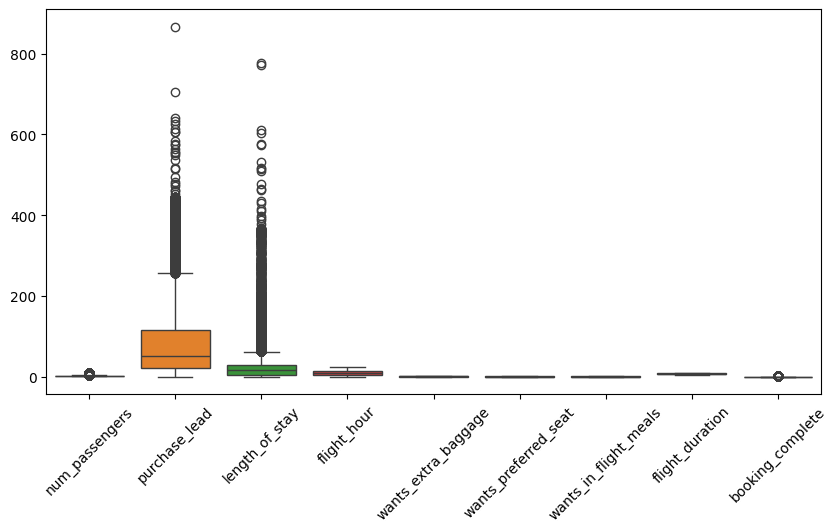

In [103]:
# Displaying range of outliers
plt.figure(figsize=(10,5))
sns.boxplot(data)
plt.xticks(rotation= 45)

Outliers found in purchase lead and lenght of stay columns

In [104]:
# Cross checking unique values 
print(data.sales_channel.unique(),data.trip_type.unique())

['Internet' 'Mobile'] ['RoundTrip' 'CircleTrip' 'OneWay']


# Data Cleaning and Preprocessing

In [105]:
# Sorting duplicactes 
data.duplicated().sum()
data.drop_duplicates(keep= 'first', inplace= True)
assert data.duplicated().sum() == 0

(0.0, 400.0)

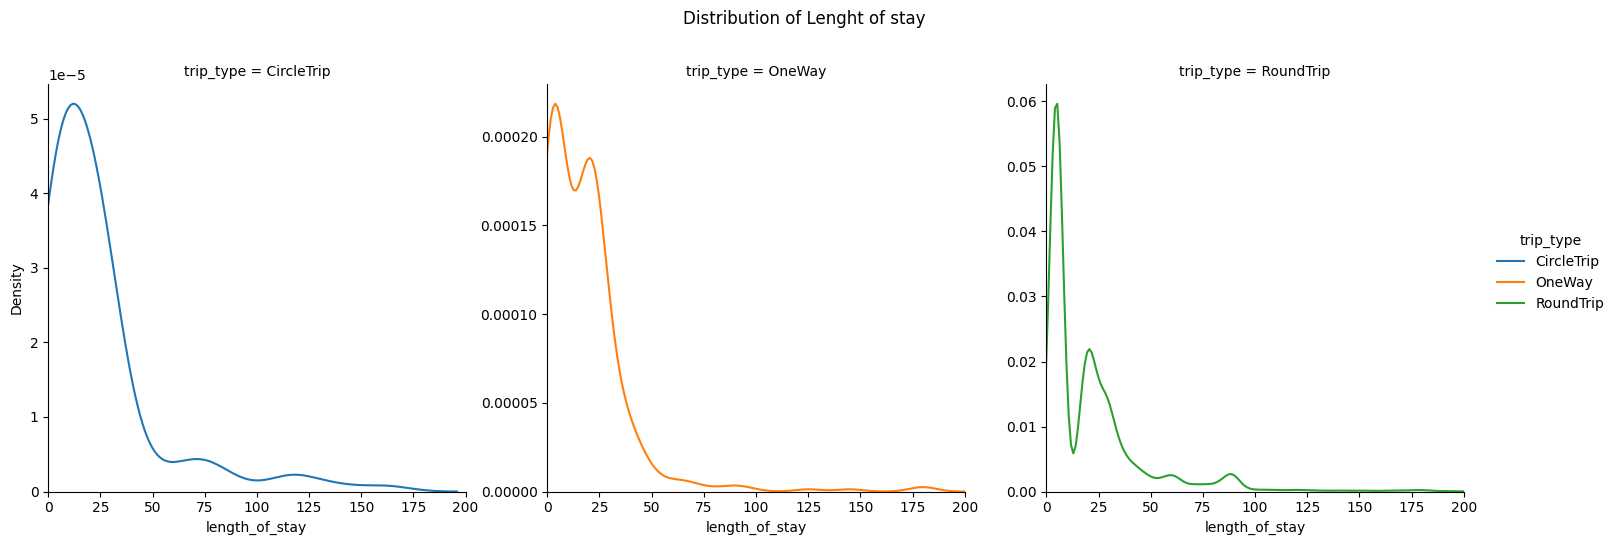

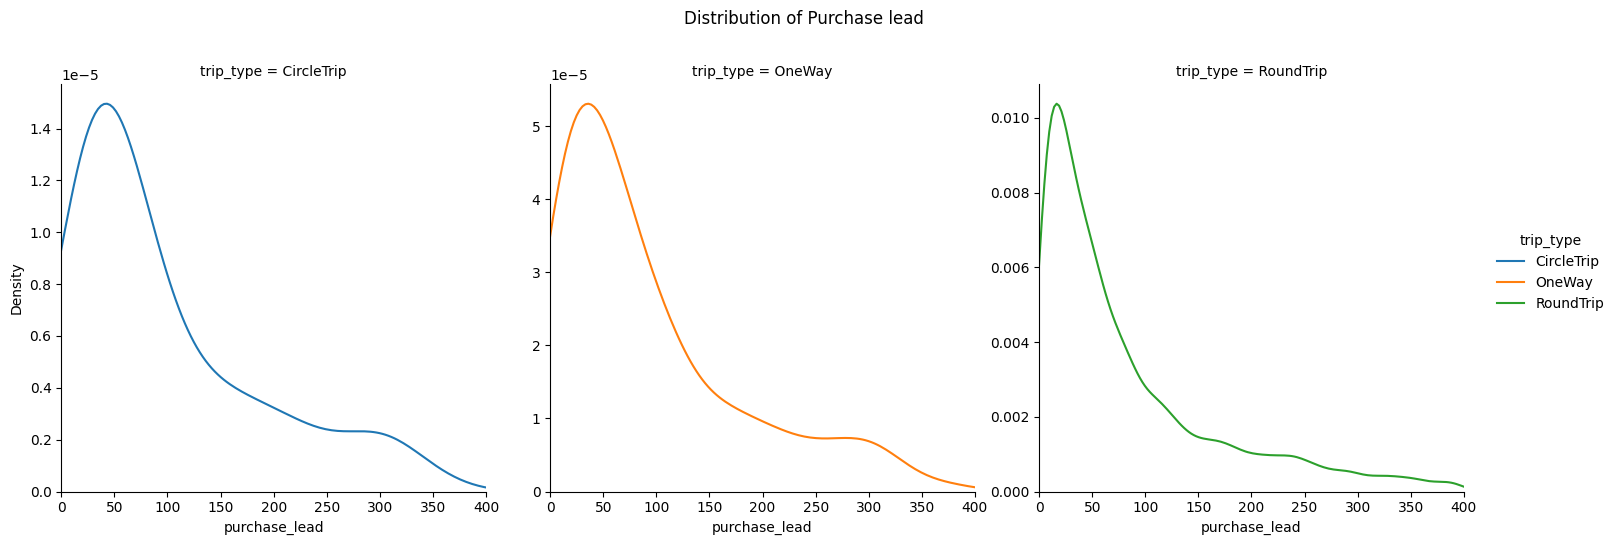

In [126]:
# Displaying distribution of 'lenght_of_stay'
sns.displot(data= data, x= 'length_of_stay',col= 'trip_type', hue= 'trip_type', kind= 'kde', facet_kws={'sharey': False}).fig.suptitle('Distribution of Lenght of stay', y= 1.08)
plt.xlim(data['length_of_stay'].min(),data['length_of_stay'].max())
# Displaying distribution of 'purchase_lead'
sns.displot(data= data, x= 'purchase_lead',col= 'trip_type', hue= 'trip_type', kind= 'kde', facet_kws={'sharey': False}).fig.suptitle('Distribution of Purchase lead', y= 1.08)
plt.xlim(data['purchase_lead'].min(),data['purchase_lead'].max())


Distribution of length of stay and purchase lead as columns of outliers are suspected to be related to the imbalance in the Trip type column

In [107]:
# Handling outliers
print('lenght of dataset before handling outliers:', data.shape)
data.drop(index= data[data.length_of_stay > 200].index, inplace= True)
data.drop(index= data[data.purchase_lead > 400].index, inplace= True)
# Confirming changes 
assert data.purchase_lead.max() == 400
assert data.length_of_stay.max() == 200
print('lenght of dataset after handling outliers:', data.shape)


lenght of dataset before handling outliers: (49281, 14)
lenght of dataset after handling outliers: (48629, 14)


In [108]:
# Rounding up flight duration
data['flight_duration'] = round(data.flight_duration).astype('int')
data.flight_duration.unique()

array([ 6,  5,  8,  7,  9, 10])

In [110]:
# Converting data types
data.dtypes
converts = ['sales_channel','trip_type','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','booking_complete']

# Create a mapping dictionary
day_to_int = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

# Apply the mapping
data['int_dayofweek'] = data['flight_day'].map(day_to_int)

# Verify the conversion
print(data[['flight_day','int_dayofweek']].head())
# Further data type conversions
data[converts] = data[converts].astype('category')
nums = data.drop(columns= converts).select_dtypes('int64').columns


  flight_day  int_dayofweek
0        Sat              5
1        Sat              5
2        Wed              2
3        Sat              5
4        Wed              2


In [111]:
# Performing Auto EDA
customer_profile = ProfileReport(data)
customer_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [112]:
# Extracting features and target variables
features = data.drop(columns=['route', 'booking_origin','booking_complete']).columns
target = ['booking_complete']
# Extracting categorical and numerical columns
cats = data[features].select_dtypes(['object','category']).columns
num = data[features].select_dtypes('number').columns
cats

Index(['sales_channel', 'trip_type', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals'],
      dtype='object')

# Model Creation and pipeline

In [114]:
# Importing I+OrdinalEncoder for transformation
from sklearn.preprocessing import OrdinalEncoder

In [122]:
# Creating Transformer
cats_pipeline = make_pipeline(OrdinalEncoder())
num_pipeline = make_pipeline(StandardScaler())
transformer = ColumnTransformer([('category',cats_pipeline,cats),('numerics',num_pipeline,num)])
# Itemizing models for comparison
models = {'LogReg': LogisticRegression(max_iter=200,class_weight='balanced'),'DecisionTree': DecisionTreeClassifier(), 'VotingClass':VotingClassifier(estimators=[
        ('LogReg', LogisticRegression(max_iter=200,class_weight='balanced')),
        ('DecisionTree', DecisionTreeClassifier())
    ]), 'Random_forest': RandomForestClassifier()}

In [116]:
# Splitting dataset 
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)
# Comparing models
result = {}
for key, val in models.items():
    pipeline = make_pipeline(transformer, val)
    cross_val = cross_val_score(pipeline, X_train, y_train, cv= 5)
    result[key] = np.mean(cross_val)

print(result)

{'LogReg': 0.5943301997649824, 'DecisionTree': 0.7396886016451234, 'VotingClass': 0.7954465334900117, 'Random_forest': 0.8405111633372503}


# Model Evaluation

In [117]:
pipe = make_pipeline(transformer, models['Random_forest'])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
train_score = pipe.score(X_train,y_train)
Accuracy = accuracy_score(y_test,y_pred)
F1 = f1_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
print('Train score: ',train_score)
print('Accuracy_score: ', Accuracy)
print('F1_score: ', F1, '\n', report )

Train score:  0.9992949471210341
Accuracy_score:  0.8453629446843512
F1_score:  0.07313064913722268 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     12460
           1       0.29      0.04      0.07      2129

    accuracy                           0.85     14589
   macro avg       0.57      0.51      0.49     14589
weighted avg       0.77      0.85      0.79     14589



In [118]:
import pandas as pd

# Assuming y_test and y_pred are both pandas Series or NumPy arrays
comparison_df = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred
})

print((comparison_df.Actual == comparison_df.Predicted).value_counts())  # Print the first few rows for inspection



True     12333
False     2256
Name: count, dtype: int64


Text(0.5, 1.0, 'RandomForest Confusion_Matrix')

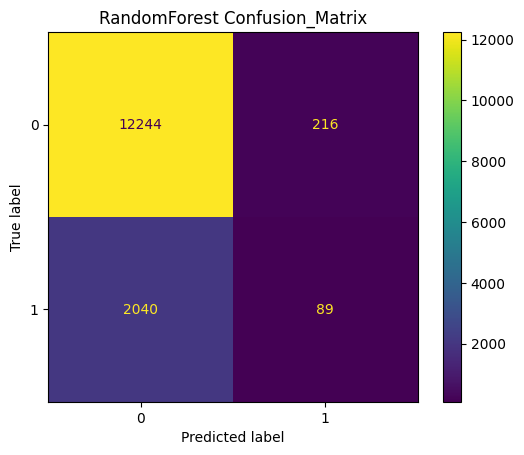

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
cmd.plot()
plt.title('RandomForest Confusion_Matrix')

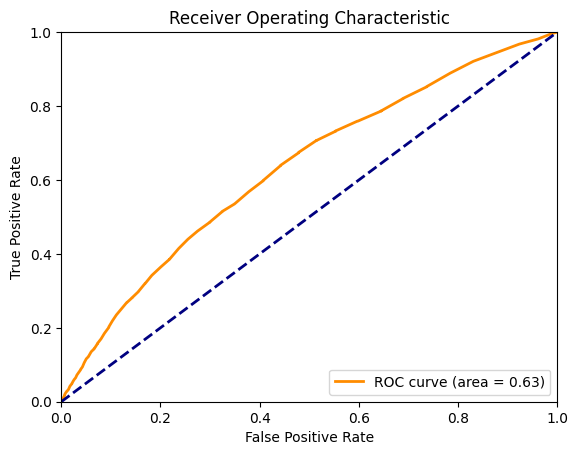

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Results
Best Model: The Random Forest classifier showed the highest performance in cross-validation and was selected as the final model.
Performance Metrics: The model achieved an accuracy of 84.5% and an F1 score of 0.073. Despite high accuracy, the low F1 score indicates challenges in predicting the minority class, highlighting the need for addressing class imbalance.
Confusion Matrix and ROC Curve: Detailed analysis of the confusion matrix and ROC curve provided insights into model performance, particularly in identifying false positives and negatives.

# Conclusion
The Random Forest model, although having a high train score, shows signs of overfitting. The low F1 score indicates poor performance in predicting the minority class. Future work should focus on addressing class imbalance, possibly through techniques such as SMOTE, and further tuning model hyperparameters.


! pip3 install imblearn